In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
path = "/kaggle/input/airbnb-price-determinants-in-europe/barcelona_weekdays.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,474.317499,Entire home/apt,False,False,4.0,False,0,1,10.0,91.0,1,1.111996,0.630491,526.469420,17.942927,915.587083,20.154890,2.17556,41.39624
1,169.897829,Private room,False,True,2.0,True,1,0,10.0,88.0,1,1.751839,0.124017,320.127526,10.910462,794.277350,17.484489,2.14906,41.38714
2,161.984779,Private room,False,True,4.0,False,0,1,9.0,88.0,1,1.670493,0.080322,344.073936,11.726595,840.673617,18.505814,2.15357,41.37859
3,367.956804,Entire home/apt,False,False,3.0,False,0,1,10.0,91.0,1,1.475847,0.093107,400.057449,13.634603,946.589884,20.837357,2.16839,41.37390
4,196.895292,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.855452,0.272486,346.042245,11.793678,792.296039,17.440874,2.15238,41.37699


# Data Preposessing

## DEALING WITH MISSING VALUES

In [3]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,288.391667,2.756270,0.376849,0.350482,9.285531,90.929260,1.216720,2.117302,0.434875,464.371805,15.826540,877.664048,19.320087,2.168975,41.393308
std,321.180435,1.276615,0.484752,0.477275,1.007445,8.695707,0.569475,1.351517,0.275846,268.318982,9.144744,461.294504,10.154512,0.019657,0.015947
min,69.588289,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.119903,0.013004,93.820461,3.197553,159.835498,3.518471,2.105190,41.349540
25%,161.984779,2.000000,0.000000,0.000000,9.000000,88.000000,1.000000,1.090570,0.252128,282.772255,9.637335,494.391320,10.883075,2.156000,41.381215
50%,208.532129,2.000000,0.000000,0.000000,10.000000,93.000000,1.000000,1.751839,0.370507,389.198464,13.264511,801.812049,17.650351,2.170710,41.390360
75%,335.373659,3.000000,1.000000,1.000000,10.000000,97.000000,1.000000,2.949202,0.554220,591.594276,20.162487,1211.256634,26.663486,2.179375,41.404000
max,6943.700980,6.000000,1.000000,1.000000,10.000000,100.000000,6.000000,8.443957,2.402779,2934.133441,100.000000,4542.754150,100.000000,2.225520,41.463080


In [4]:
df.shape

(1555, 19)

In [5]:
df_complete = df.dropna()
df_complete.shape

(1555, 19)

## FINDING OUTLIERS

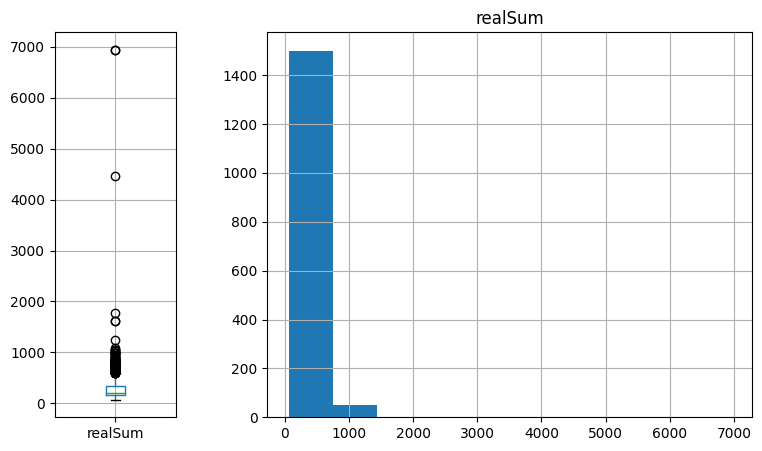

In [6]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df.boxplot(column='realSum',ax=axes[0]);
df.hist(column='realSum', ax=axes[1]);

In [7]:
Q1 = df['realSum'].quantile(0.25)
Q3 = df['realSum'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(161.98477901645447, 335.3736588544697, 173.3888798380152)

In [8]:
small_outliers = df['realSum'] < (Q1 - 1.5 * IQR)
big_outliers = df['realSum'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 117)

In [9]:
df['realSum'][small_outliers | big_outliers].head()

17    1041.496963
21     691.926362
42     902.553122
49     730.327926
63     990.527614
Name: realSum, dtype: float64

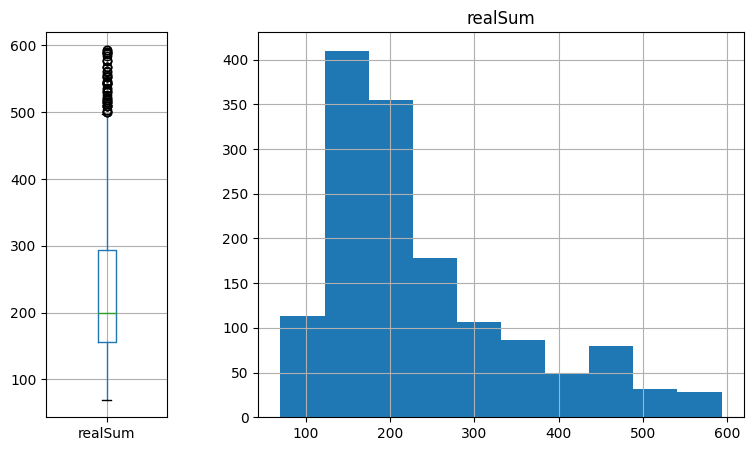

In [10]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df[~(small_outliers | big_outliers)].boxplot(column='realSum',ax=axes[0]);
df[~(small_outliers | big_outliers)].hist(column='realSum', ax=axes[1]);

In [11]:
df_clean = df[~(small_outliers | big_outliers)]
df_clean.shape

(1438, 19)

In [12]:
df_clean.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [13]:
# Identifying categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'realSum']

# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df.drop('realSum', axis=1))

# View transformed features
transformed_features = preprocessor.transformers_[0][1].get_feature_names_out(numerical_cols).tolist() + \
                       preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols).tolist()

transformed_features

['person_capacity',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']